# Push DeGroot network experiments
 Generate a strongly (but randomly) connected digraph with 4 nodes. Two nodes will have opinions {0.0, 1.0}, and the others will have random opinions in the range [0.0; 1.0]. Nodes will be enumerated and edges will get a letter assigned.

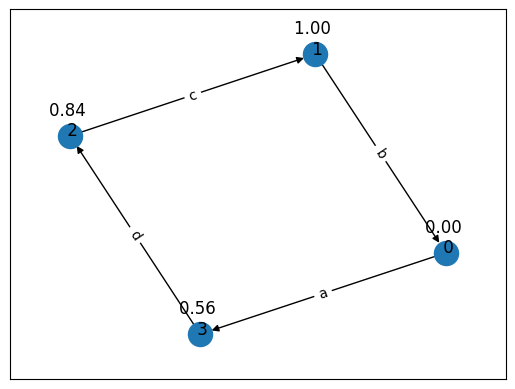

In [2]:
from PushDeGrootGraph import *

G = PushDeGrootGraph(4, ops=[0,1])
G.draw()

Generate a random word of length 10 composed of G edges' letters. Then execute it over the graph G. E.g. if a word starts with letter a, and edge a goes from node 0 to node 3, then node 3's belief will be updated with the average of the opinions between node 0 and 3. The following letters will be executed in the same way.

['0_15', '12_13', '19_10', '12_17', '12_13', '9_14', '5_14', '0_16', '7_3', '10_6']


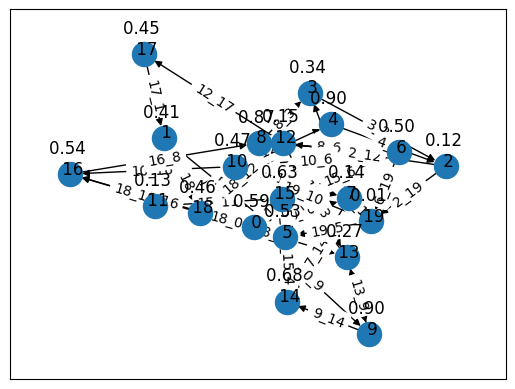

In [4]:
from WordGenerator import *

random_word = generate_random_word(G, 10)
print(random_word)
G.execute_word(random_word)
G.draw()


Generate a word of length 10000 over the alphabet of G's edges, such that it is k-fair with k equal to the length of the alphabet.
Then check whether this word is fair under k-fairness with the same previous k.
After that, check 1000-fairness for a random word of length 10000.

In [4]:

print(check_kfairness(G, generate_kfair_word(G, 10000, len(G.edges)), k=len(G.edges)))

print(check_kfairness(G, generate_random_word(G, 10000), k=1000))


True
True


### **Claim:** The probability of a random word being k-fair converges to 1 as k grows

*Validated* with the following experiment:
Generate `sample_graphs` graphs, and for each one of them, generate `words_per_graph` words. Check if they are 1-fair, 2-fair, 3-fair ... and so on. Register what is the minimum k for which the word is k-fair. The y axis of the plot counts how many different words are minimum k-fair for k's along the x axis.

Remember, if a word is k-fair, it is j-fair for any $j>k$, that's why I only care about a minimum k. Running the following cell might take some time.

In [5]:
import matplotlib.pyplot as plt

nodes_per_graph = 20 # this controls indirectly the size of the alphabet
sample_graphs = 1
words_per_graph = 1000
letters_per_word = 500

fairness_count = [0 for _ in range(letters_per_word)]
for i in range(sample_graphs):
    G = PushDeGrootGraph(nodes_per_graph)
    #print("graph %d/%d; edge count: %d" % (i, sample_graphs, len(G.edges)))
    for j in range(words_per_graph):
        #print("word %d/%d" % (j, words_per_graph))
        word = generate_random_word(G, letters_per_word)
        for k in range(len(word)):
            if check_kfairness(G, word, k):
                fairness_count[k] += 1
                break

plt.plot(fairness_count)

KeyboardInterrupt: 

Testing the probability of a random word being k-fair

In [ ]:
runs = 50000
word_length = 1000
k = len(G.edges)*10
results = []
print(len(G.edges))
for _ in range(runs):
    word = generate_random_word(G, word_length)
    results.append(check_kfairness(G, word, k))
print(" %d out of %d random words are %d-fair" % (results.count(True), runs, k))

7
 49172 out of 50000 random words are 70-fair


## Jesus' Inequality
Define a function that will be ran everytime a letter is executed. In this case, an invariant proposed by prof. Jesus Aranda is implemented, which is checked for a k-fair word of length 1000 with k equal to the size of the alphabet.

True


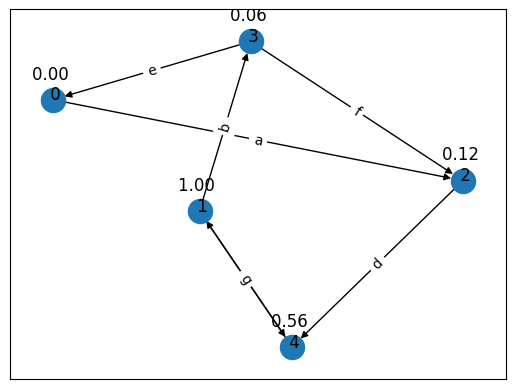

In [ ]:
G = PushDeGrootGraph(5, ops=[0,1])
G.draw()
class JesusInequalityTest:
    def __init__(self, G):
        self.G = G
        self.opinion_history = []
        self.holds = True

    def check(self, t): # This will be run after each step
        self.opinion_history.append(list(self.G.opinion.values()))
        k = len(self.G.edges)
        E = len(self.G.edges)
        if t >= E * k:
            Mtek = max(self.G.opinion.values())
            Mt = max(self.opinion_history[t - (E * k)])
            mt = min(self.opinion_history[t-(E * k)])

            if Mtek > Mt + (0.5 ** (E * k)) * (mt - Mt):
                self.holds = False
    
    def terminate(self):
        return self.holds
        
word = generate_kfair_word(G, 1000, k=len(G.edges))
G.set_initial_opinions(ops=[0,1])
print(G.execute_word(word, Check=JesusInequalityTest))


Check the invariant for many k-fair words

In [ ]:
runs = 5000
word_length = 2000

results = []
print(len(G.edges))
for _ in range(runs):
    G.set_initial_opinions(ops=[0,1])
    kfair_word = generate_kfair_word(G, word_length, k=len(G.edges))
    results.append(G.execute_word(kfair_word, Check=JesusInequalityTest))
print("Jesus' invariant held for %d out of %d %d-fair words" % (results.count(True), runs, len(G.edges)))

7
Jesus' invariant held for 5000 out of 5000 7-fair words


Reset opinions, and check the same for random words. (This may take a while)

*Observation!* The inequality seems to hold for a lot of random words (aprox. 99.5% times)

In [ ]:
runs = 5000
results = []
for _ in range(runs):
    G.set_initial_opinions(ops=[0,1])
    random_word = generate_random_word(G, 10000)
    results.append(G.execute_word(random_word, Check=JesusInequalityTest))
print("Jesus' invariant held for %d out of %d random words" % (results.count(True), runs))

Jesus' invariant held for 4976 out of 5000 random words


Reset opinions again, and check Jesus' invariant for a purposefully bad word, to make it likely to not hold.

In [ ]:
very_bad_word = "ccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc"
G.set_initial_opinions(ops=[0,1])
print(G.execute_word(very_bad_word, Check=JesusInequalityTest))

False


## Probabilistic case 

(not sure this is what Prof. Frank meant)

Generate `graph_samples` graphs, and for each generate `trials_per_graph` random words, execute it, and take the average of opinions at the end of the run. Running the following cell might take some time.

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   3.,   3.,   3.,
          2.,   4.,  10.,   8.,  10.,  10.,  25.,  18.,   9.,  13.,  23.,
         29.,  34.,  45.,  47.,  44.,  62.,  80.,  80.,  93.,  92., 115.,
        104., 138., 142., 154., 138., 209., 213., 208., 222., 229., 255.,
        247., 294., 278., 287., 270., 278., 276., 281., 288., 272., 263.,
        271., 278., 267., 258., 256., 246., 185., 212., 224., 195., 163.,
        181., 149., 138., 121.,  99., 112.,  90., 104.,  87.,  79.,  48.,
         52.,  41.,  41.,  34.,  22.,  16.,  24.,  19.,  11.,  21.,   8.,
          7.,  10.,   3.,   2.,   2.,   2.,   4.,   3.,   0.,   1.,   1.,
          1.]),
 array([0.33135453, 0.33460067, 0.33784682, 0.34109297, 0.34433912,
        0.34758527, 0.35083142, 0.35407756, 0.35732371, 0.36056986,
        0.36381601, 0.36706216, 0.37030831, 0.37355445, 0.3768006 ,
        0.38004675, 0.3832929 , 0.38653905, 0.38978519, 0.39303134,
        0.39627749, 0.39952364, 0.40276979, 0.

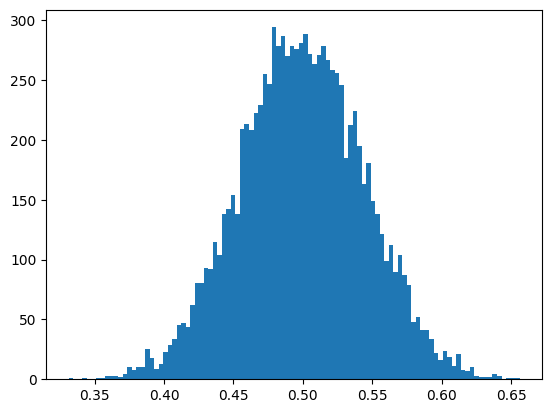

In [ ]:
graph_samples = 10
trials_per_graph = 1000

nodes = 100
word_len = 20000

consensuses = []
for i in range(graph_samples):
    G = PushDeGrootGraph(nodes)
    for j in range(trials_per_graph):
        G.set_initial_opinions()
        w = generate_random_word(G, word_len)
        G.execute_word(w)
        consensus = sum(G.opinion.values()) / len(G.nodes)
        consensuses.append(consensus)
        #print("sample %d/%d trial %d/%d" % (i, graph_samples, j, trials_per_graph))

plt.hist(consensuses, bins=100)